In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as patches


# Training data preparation 

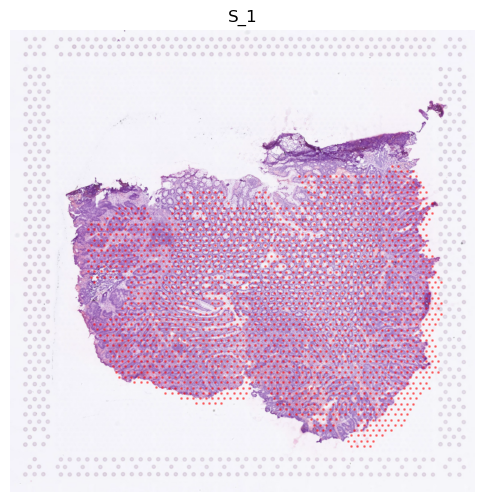

In [2]:
with h5py.File("../elucidata_ai_challenge_data.h5", "r") as h5file:
    train_images = h5file["images/Train"]
    train_spots = h5file["spots/Train"]
    
    sample = 'S_1'
    image = np.array(train_images[sample])
    spots = np.array(train_spots[sample])
    x, y = spots["x"], spots["y"]
    
    plt.figure(figsize=(6,6))
    plt.imshow(image, aspect="auto")
    plt.scatter(x, y, color="red", s=1, alpha=0.4)
    plt.axis('off')
    plt.title(sample)
    plt.show()

In [3]:

# Load and display (x,y) spot locations and cell type annotation table for Train slides
with h5py.File("../elucidata_ai_challenge_data.h5", "r") as f:
    train_spots = f["spots/Train"]
    
    # Dictionary to store DataFrames for each slide
    train_spot_tables = {}
    
    for slide_name in train_spots.keys():
        # Load dataset as NumPy structured array
        spot_array = np.array(train_spots[slide_name])
        
        # Convert to DataFrame
        df = pd.DataFrame(spot_array)
        
        # Store in dictionary
        train_spot_tables[slide_name] = df
        print(slide_name)

# Example: Display the spots table for slide 'S_1'
train_spot_tables['S_1']

S_1
S_2
S_3
S_4
S_5
S_6


x     y        C1        C2        C3        C4        C5        C6  \
0     1554  1297  0.014401  0.057499  0.022033  0.001704  0.533992  1.511707   
1      462  1502  0.116196  0.197176  0.110600  0.042614  5.587681  0.006885   
2     1488  1548  0.133284  0.035880  0.061352  0.003073  1.104479  0.009174   
3     1725  1182  0.087715  0.235223  0.090382  0.013902  8.760482  0.140912   
4      581  1113  0.128468  0.066399  0.098982  0.047022  3.425771  0.001009   
...    ...   ...       ...       ...       ...       ...       ...       ...   
2192  1055   701  0.047236  0.112721  0.052490  0.002092  0.000913  0.393805   
2193  1225   862  0.070764  0.119310  0.193938  0.001239  0.003851  0.588956   
2194   765  1479  0.194491  0.048068  0.150061  0.002978  0.119206  0.000213   
2195   607  1525  0.002968  0.151899  0.015931  0.000071  1.354983  0.000152   
2196   568  1181  0.000232  0.004759  0.001376  0.003225  0.874639  0.000026   

            C7        C8  ...           C26       C27       C28       C29  \
0     0.015313  0.020029  ...  1.009572e-03  2.068237  0.121361  0.007344   
1     0.096346  0.001711  ...  6.918171e-04  0.014442  0.000238  0.024071   
2     0.009175  0.000114  ...  9.577447e-05  0.149792  0.001401  0.000699   
3     0.188859  0.010154  ...  1.964150e-03  0.142549  0.002036  0.047165   
4     0.026881  0.000468  ...  7.189078e-05  0.005920  0.000048  0.006359   
...        ...       ...  ...           ...       ...       ...       ...   
2192  0.045220  0.013414  ...  7.530558e-03  0.559967  0.154793  0.133587   
2193  0.037731  0.004072  ...  3.219223e-02  0.667076  0.094247  0.136623   
2194  0.005332  0.000078  ...  2.628421e-04  0.000273  0.000022  0.000027   
2195  0.019254  0.001267  ...  1.377452e-03  0.003754  0.001420  0.088000   
2196  0.003913  0.000003  ...  8.989834e-07  0.001573  0.000002  0.000239   

           C30       C31       C32       C33       C34       C35  
0     0.000017  0.036891  0.035934  0.118937  0.001472  0.050057  
1     0.000023  0.217589  0.100662  0.004027  0.004122  0.049491  
2     0.000009  0.024491  0.018810  0.004171  0.000425  0.015348  
3     0.000022  0.180372  0.202981  0.003709  0.001845  0.116022  
4     0.000585  0.052661  0.032168  0.000107  0.000107  0.013103  
...        ...       ...       ...       ...       ...       ...  
2192  0.000013  0.051041  0.113100  0.003147  0.004971  0.128265  
2193  0.000009  0.050518  0.119685  0.027743  0.016413  0.287171  
2194  0.000042  0.029386  0.019977  0.000039  0.000119  0.006778  
2195  0.000536  0.073240  0.113631  0.009040  0.000090  0.025716  
2196  0.003375  0.002501  0.001325  0.000003  0.000001  0.000468  

[2197 rows x 37 columns]

In [5]:
def extract_tile(slide_img, x, y, tile_size=224):
    half = tile_size // 2
    x1, x2 = x - half, x + half
    y1, y2 = y - half, y + half
    tile = slide_img[y1:y2, x1:x2]  # shape: (224, 224, 3)
    return tile

import numpy as np

def pad_tile(tile, target_size=64, mode='white'):
    """
    Â∞á tile padding ÊàêÊåáÂÆöÂ§ßÂ∞è„ÄÇ
    
    - tile: numpy array, shape (H, W, C)
    - target_size: ÁõÆÊ®ôÈÇäÈï∑ (e.g., 64)
    - mode: 'constant' (zero padding), 'reflect', Êàñ 'white' (255 padding)
    """
    h, w, c = tile.shape
    assert h <= target_size and w <= target_size, "Tile size must be <= target size"
    
    pad_h = target_size - h
    pad_w = target_size - w

    pad_top = pad_h // 2
    pad_bottom = pad_h - pad_top
    pad_left = pad_w // 2
    pad_right = pad_w - pad_left

    if mode == 'constant':
        value = 0
    elif mode == 'white':
        value = 1
    elif mode == 'reflect':
        return np.pad(tile, 
                      ((pad_top, pad_bottom), (pad_left, pad_right), (0, 0)),
                      mode='reflect')
    else:
        raise ValueError("Unsupported padding mode.")

    padded_tile = np.pad(tile,
                         ((pad_top, pad_bottom), (pad_left, pad_right), (0, 0)),
                         mode='constant',
                         constant_values=value)
    return padded_tile



def get_spots_in_tile(df, center_x, center_y, tile_size):
    half = tile_size // 2
    x_min, x_max = center_x - half, center_x + half
    y_min, y_max = center_y - half, center_y + half

    df_in_tile = df[
        (df['x'] >= x_min) & (df['x'] <= x_max) &
        (df['y'] >= y_min) & (df['y'] <= y_max)
    ].copy()

    df_in_tile = df_in_tile[
        ~((df_in_tile['x'] == center_x) & (df_in_tile['y'] == center_y))
    ]

    return df_in_tile

    return df_in_tile
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def plot_tile_with_spots_v2(
    slide_image,
    spot_df=None,
    center_x=None,
    center_y=None,
    tile_size=None,
    stride=None,
    grid_size=None,
    spot_radius_px=15,
    ax=None,
    title=None,
    show_legend=False
):
    """
    Ëê¨Áî®Áâà patch ÂèØË¶ñÂåñÂ∑•ÂÖ∑Ôºö
    - Ëã•ÊúâÊèê‰æõ center_x, center_y, tile_size ‚Üí Áï´ tile
    - Ëã•Ê≤íÊúâÈÄô‰∫õÂèÉÊï∏ ‚Üí Áï´Êï¥Âºµ slide + ÊâÄÊúâ spots
    """

    H, W, _ = slide_image.shape

    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 6))

    if center_x is not None and center_y is not None and tile_size is not None:
        if stride is None:
            stride = tile_size

        if grid_size:
            full_tile_size = tile_size + stride * (grid_size - 1)
        else:
            full_tile_size = tile_size

        def extract_tile(slide_img, x, y, total_size):
            x, y = int(x), int(y)
            half = total_size // 2
            x1, x2 = max(0, x - half), min(W, x + half)
            y1, y2 = max(0, y - half), min(H, y + half)
            return slide_img[y1:y2, x1:x2]

        tile = extract_tile(slide_image, center_x, center_y, full_tile_size)
        ax.imshow(tile)

        center_px = full_tile_size // 2
        ax.scatter(center_px, center_px, c='red', s=40, label='Center Spot')

        circle = patches.Circle(
            (center_px, center_px),
            spot_radius_px,
            linewidth=1.5,
            edgecolor='yellow',
            facecolor='none'
        )
        ax.add_patch(circle)

        if spot_df is not None:
            for _, neighbor in spot_df.iterrows():
                dx = int(neighbor['x']) - center_x
                dy = int(neighbor['y']) - center_y
                tile_x = center_px + dx
                tile_y = center_px + dy
                ax.scatter(tile_x, tile_y, c='orange', s=20)

        if grid_size:
            for row in range(grid_size):
                for col in range(grid_size):
                    x0 = col * stride
                    y0 = row * stride
                    rect = patches.Rectangle(
                        (x0, y0),
                        tile_size, tile_size,
                        linewidth=1,
                        edgecolor='blue',
                        facecolor='none',
                        linestyle='--'
                    )
                    ax.add_patch(rect)

    else:
        # Ê≤íÊúâ tile ‚Üí Áõ¥Êé•Áï´Êï¥Âºµ slide Âúñ
        ax.imshow(slide_image)
        if spot_df is not None:
            ax.scatter(spot_df['x'], spot_df['y'], c='orange', s=10, label='Spots')

    ax.axis('off')
    if title:
        ax.set_title(title)
    if show_legend:
        ax.legend(loc='upper right')



def apply_circular_mask(tile, background_value=1):
    """
    Â∞á tileÔºàH, W, CÔºâÈÅÆÁΩ©ÊàêÂúìÂΩ¢ÔºåÈùûÂúìÂçÄÂüüË®≠ÁÇ∫ background_value„ÄÇ
    È†êË®≠ËÉåÊôØÁÇ∫ÁôΩËâ≤Ôºà255Ôºâ
    """
    h, w, c = tile.shape
    assert h == w, "Tile must be square"

    radius = h // 2
    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - radius)**2 + (Y - radius)**2)
    mask = dist_from_center <= radius

    # Êì¥Â±ï mask Ëá≥ RGB ÈÄöÈÅì
    mask = np.expand_dims(mask, axis=-1)  # shape (H, W, 1)
    
    if background_value == 0:
        bg_color = np.zeros_like(tile)
    else:
        bg_color = np.full_like(tile, background_value)
    
    return tile * mask + bg_color * (1 - mask)



## calculate tile_size

In [6]:
from scipy.spatial.distance import pdist, squareform
import numpy as np

train_spacing_per_slide = {}

for slide_id, df in train_spot_tables.items():
    coords = df[['x', 'y']].values
    if len(coords) < 2:
        print(f"‚ö†Ô∏è Slide {slide_id} has less than 2 spots, skipping.")
        continue

    dist_matrix = squareform(pdist(coords))
    np.fill_diagonal(dist_matrix, np.inf)
    min_dists = dist_matrix.min(axis=1)
    mean_spacing = min_dists.mean()

    train_spacing_per_slide[slide_id] = mean_spacing
    print(f"üìè {slide_id}: Âπ≥Âùá spot ÈñìË∑ù = {mean_spacing:.2f} pixels")




üìè S_1: Âπ≥Âùá spot ÈñìË∑ù = 25.90 pixels
üìè S_2: Âπ≥Âùá spot ÈñìË∑ù = 25.91 pixels
üìè S_3: Âπ≥Âùá spot ÈñìË∑ù = 25.20 pixels
üìè S_4: Âπ≥Âùá spot ÈñìË∑ù = 25.02 pixels
üìè S_5: Âπ≥Âùá spot ÈñìË∑ù = 25.01 pixels
üìè S_6: Âπ≥Âùá spot ÈñìË∑ù = 25.24 pixels


## show image

In [7]:
tile_size = round(max(train_spacing_per_slide.values()))  # ‚Üí round(77.7) ‚Üí 78
print(f"\nüîç ÊâÄÊúâ slide tile size {tile_size} pixels")

df = train_spot_tables['S_1']
row = df.iloc[0]

x = int(row['x'])
y = int(row['y'])

# ÂèñÂæótileÁØÑÂúçÂÖßÁöÑspotÂÄë
neighbors_df = get_spots_in_tile(df, x, y, tile_size=128)

print(f"Found {len(neighbors_df)} spots in this tile.")
print(neighbors_df[['x', 'y']])
print(x,y)


üîç ÊâÄÊúâ slide tile size 26 pixels
Found 21 spots in this tile.
         x     y
237   1580  1297
291   1541  1320
292   1606  1251
342   1501  1342
350   1514  1274
413   1554  1251
500   1580  1251
537   1514  1320
594   1580  1342
628   1528  1297
737   1606  1342
739   1606  1297
860   1554  1342
887   1501  1251
1212  1501  1297
1388  1567  1320
1839  1528  1342
1875  1593  1274
2018  1528  1251
2132  1541  1274
2173  1593  1320
1554 1297


In [88]:


plot_tile_with_spots_v2(
    slide_image=image,
    spot_df=neighbors_df,
    center_x=x,
    center_y=y,
    tile_size=128,
    #grid_size=3,
    spot_radius_px=12
)


## Start tiling

In [10]:
from scipy.spatial import KDTree
def compute_edge_index(coords, radius=64):
    """
    Ë®àÁÆóÊØèÂÄã batch ÁöÑ edge_indexÔºàÈÑ∞Êé•Èóú‰øÇÔºâ
    ÂêåÊôÇÈ°ØÁ§∫ÊØèÂÄãÈªûÁöÑÈÑ∞Â±ÖÊï∏Èáè
    """
    kdtree = KDTree(coords)
    edge_list = []
    
    # Áî®‰æÜÁµ±Ë®àÊØèÂÄãÈªûÁöÑÈÑ∞Â±ÖÊï∏Èáè
    neighbor_counts = []
    
    for i, coord in enumerate(coords):
        neighbors = kdtree.query_ball_point(coord, r=radius)  # Êü•ÊâæÂçäÂæëÁÇ∫ radius ÁöÑÈÑ∞Â±Ö
        
        # Ë®àÁÆóÁï∂ÂâçÈªûÁöÑÈÑ∞Â±ÖÊï∏Èáè
        neighbor_counts.append(len(neighbors))
        
        # Â∞áÊâÄÊúâÈÑ∞Â±ÖÊ∑ªÂä†Âà∞ edge_list ‰∏≠
        for j in neighbors:
            if i != j:
                edge_list.append([i, j])

    # È°ØÁ§∫ÊØèÂÄãÈªûÁöÑÈÑ∞Â±ÖÊï∏Èáè
    
            # Â∞áÈÇäÂàóË°®ËΩâÊèõÁÇ∫ PyG Ê†ºÂºè
    edge_index = torch.tensor(edge_list, dtype=torch.long).t().contiguous()
    
    return edge_index


In [12]:
import h5py
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import torch
train_S_tiles = []
train_M_tiles = []
train_L_tiles = []
train_labels = []
train_meta_info = []
train_total_node = 0
train_edge_indices = []
normal_coords = []

with h5py.File("../elucidata_ai_challenge_data.h5", "r") as h5file:
    train_images = h5file["images/Train"]
    slide_ids = list(train_spot_tables.keys())

    for slide_id in slide_ids:
        if slide_id not in train_images:
            print(f"‚ö†Ô∏è Slide {slide_id} not found in HDF5, skipping.")
            continue

        image = train_images[slide_id][()]  # H x W x 3
        df = train_spot_tables[slide_id]

        
        # ÊèêÂèñ (x, y) Â∫ßÊ®ô‰∏¶ÈÄ≤Ë°åÊ®ôÊ∫ñÂåñ
        coords = df[['x', 'y']].values
        scaler = MinMaxScaler()
        coords_normalized = scaler.fit_transform(coords)  # Â∞áÂ∫ßÊ®ôÊ®ôÊ∫ñÂåñÂà∞ [0, 1] ÁØÑÂúçÂÖß
                # ÂÑ≤Â≠òÊ®ôÊ∫ñÂåñÂæåÁöÑ (x, y) Â∫ßÊ®ô
        df[['x_normalized', 'y_normalized']] = coords_normalized
        
        for i, row in df.iterrows():
            x, y = int(row['x']), int(row['y'])

            train_S_tile = extract_tile(image, x, y, tile_size=26)
            train_S_tile = pad_tile(train_S_tile, target_size=32, mode='white')
            train_S_tile = apply_circular_mask(train_S_tile, background_value=1) 
            train_M_tile = extract_tile(image, x, y, tile_size=64)
            train_L_tile = extract_tile(image, x, y, tile_size=128)
            
            neighbors_df = get_spots_in_tile(df, x, y, tile_size=128)
            neighbor_coords = neighbors_df[['x', 'y']].values
            edge_index = compute_edge_index(neighbor_coords, radius=64) # should be half tile_size
            train_total_node += len(neighbor_coords)  # Ë®àÁÆóÁ∏ΩÁØÄÈªûÊï∏Èáè
            label = row.iloc[2:-2].values.astype(np.float32)

            train_S_tiles.append(train_S_tile)
            train_M_tiles.append(train_M_tile)
            train_L_tiles.append(train_L_tile)  # ‚úÖ Â≠òÂÖ•
            train_labels.append(label)
            train_meta_info.append((slide_id, x, y))
            train_edge_indices.append(edge_index)  # ÂÑ≤Â≠òÈÇäÁ¥¢Âºï
            normal_coords.append((row['x_normalized'], row['y_normalized']))  # ÂÑ≤Â≠òÊ®ôÊ∫ñÂåñÂæåÁöÑ (x, y) Â∫ßÊ®ô

21
9
22
22
22
22
21
22
22
18
21
22
13
19
22
22
22
22
22
20
22
22
21
22
22
19
18
22
22
22
21
22
22
22
19
21
22
13
20
22
22
11
22
22
22
22
22
16
22
22
22
22
22
21
9
22
22
22
22
22
22
22
18
22
22
9
22
22
22
22
22
22
22
22
21
22
22
22
22
22
22
22
21
22
22
12
18
22
22
22
20
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
21
18
18
21
14
22
18
22
22
22
22
18
22
15
22
22
22
22
12
22
22
22
22
22
22
22
21
21
18
22
22
22
22
22
8
22
22
15
12
17
20
22
16
22
22
22
22
21
13
22
22
18
22
22
22
22
21
22
22
15
19
22
22
22
22
21
22
22
22
22
22
22
22
22
22
22
22
20
22
11
15
22
15
14
21
22
22
22
20
22
22
20
22
22
22
8
21
22
13
12
21
22
17
22
21
22
22
22
22
22
22
18
22
22
22
22
21
22
12
16
22
22
22
22
22
22
18
15
22
21
21
21
22
22
22
22
22
12
22
22
22
18
22
22
22
14
22
18
22
22
22
21
22
22
22
22
14
22
22
22
22
20
14
16
21
14
13
22
22
22
17
22
22
22
22
22
22
16
22
22
14
19
22
21
21
22
21
22
22
17
13
22
21
20
22
22
22
21
20
22
22
20
22
22
21
21
22
18
22
22
15
21
22
15
22
22
22
22
12
10
22
14
22
13
22
22
22


In [14]:
train_total_nodes = []
for i in range(len(train_S_tiles)):
    train_total_nodes.append(train_total_node)

### Validate the cut

Found 0 spots in S tile.
Found 6 spots in M tile.
Found 18 spots in L tile.
Slides: S_2, (1506, 1418)


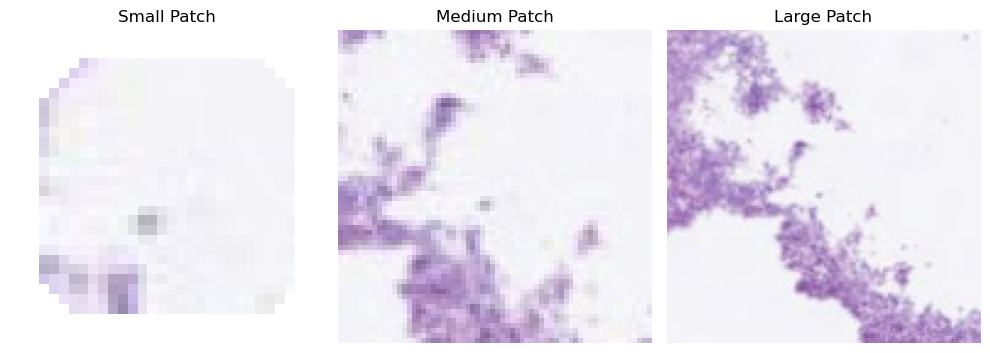

üß¨ C1~C35 Expression Comparison:
Index         Original    SubTiles      Œî Diff
----------------------------------------
C1             2.283      2.283      0.000
C2             0.037      0.037      0.000
C3             1.951      1.951      0.000
C4             0.419      0.419      0.000
C5             0.221      0.221      0.000
C6             0.000      0.000      0.000
C7             0.014      0.014      0.000
C8             0.000      0.000      0.000
C9             0.000      0.000      0.000
C10            0.000      0.000      0.000
C11            0.000      0.000      0.000
C12            0.002      0.002      0.000
C13            0.000      0.000      0.000
C14            0.001      0.001      0.000
C15            0.000      0.000      0.000
C16            0.005      0.005      0.000
C17            0.007      0.007      0.000
C18            0.237      0.237      0.000
C19            0.006      0.006      0.000
C20            0.110      0.110      0.000
C21            0

In [64]:
import random

# Èö®Ê©üÊäΩ‰∏ÄÁ≠ÜË≥áÊñôÔºàÂæûÂÖ®È´î tiles ‰∏≠Ôºâ
i = random.randint(0, len(train_meta_info) - 1)

# ÂèñÂ∞çÊáâÁöÑ sub-tiles Ëàá label
train_S_tile = train_S_tiles[i]
train_M_tile = train_M_tiles[i]
train_L_tile = train_L_tiles[i]
label = train_labels[i]
slide_id, x, y = train_meta_info[i]  # üëà slide ‰æÜÊ∫ê„ÄÅspot Â∫ßÊ®ô


# ÊâæÂéüÂßã labelÔºàÂèØÈÅ∏Ôºâ
row = train_spot_tables[slide_id]
row_match = row[(row['x'] == x) & (row['y'] == y)]
if len(row_match) == 0:
    print("‚ö†Ô∏è Êâæ‰∏çÂà∞Â∞çÊáâÁöÑ spot")
    label_gt = label  # fallback
else:
    label_gt = row_match.iloc[0].iloc[2:].values.astype(np.float32)


# ÂèñÂæótileÁØÑÂúçÂÖßÁöÑspotÂÄë
S_neighbors_df = get_spots_in_tile(row, x, y, tile_size=26)
M_neighbors_df = get_spots_in_tile(row, x, y, tile_size=64)
L_neighbors_df = get_spots_in_tile(row, x, y, tile_size=128)

print(f"Found {len(S_neighbors_df)} spots in S tile.")
print(f"Found {len(M_neighbors_df)} spots in M tile.")
print(f"Found {len(L_neighbors_df)} spots in L tile.")


# Âü∑Ë°åË¶ñË¶∫ÂåñÊØîÂ∞ç
print(f"Slides: {slide_id}, ({x}, {y})")

fig, axes = plt.subplots(1, 3, figsize=(10, 4))

plot_tile_with_spots_v2(
    train_S_tile, spot_radius_px=13,
    ax=axes[0], title="Small Patch"
)

plot_tile_with_spots_v2(
    train_M_tile, spot_radius_px=32,
    ax=axes[1], title="Medium Patch"
)

plot_tile_with_spots_v2(
    train_L_tile, spot_radius_px=64,
    ax=axes[2], title="Large Patch"
)

plt.tight_layout()
plt.show()


if label_gt is not None and label is not None:
    print("üß¨ C1~C35 Expression Comparison:")
    print(f"{'Index':<10}{'Original':>12}{'SubTiles':>12}{'Œî Diff':>12}")
    print("-" * 40)
    for i in range(35):
        ori = label_gt[i]
        sub = label[i]
        diff = sub - ori
        print(f"C{i+1:<8} {ori:>10.3f} {sub:>10.3f} {diff:>10.3f}")

## Transfer into training dataset 

In [68]:
## Make sure I have all the data
total_spots = sum(len(df) for df in train_spot_tables.values())
print(f"Total number of spots across all slides: {total_spots}")

print(f"The spots in our preprocessing datasets: {len(train_S_tiles)}")

Total number of spots across all slides: 8349
The spots in our preprocessing datasets: 8349


In [15]:
import torch


torch.save({
    'S_tiles': train_S_tiles,
    'M_tiles': train_M_tiles,
    'L_tiles': train_L_tiles,
    'labels': train_labels,
    'meta_info': train_meta_info,
    'normal_coords': normal_coords,
    'edge_indices': train_edge_indices,
    'total_nodes': train_total_nodes,
}, "../SML_train_dataset.pt")

# Test data preparation

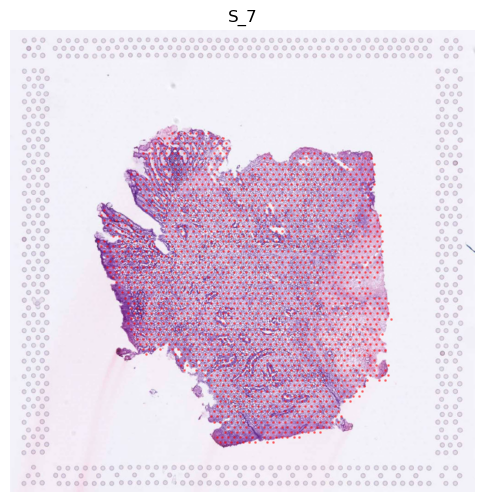

In [16]:
# Visualize Test slide ('S_7')
with h5py.File("../elucidata_ai_challenge_data.h5", "r") as h5file:
    test_images = h5file["images/Test"]
    test_spots = h5file["spots/Test"]
    
    sample = 'S_7'
    image = np.array(test_images[sample])
    spots = np.array(test_spots[sample])
    x, y = spots["x"], spots["y"]

    plt.figure(figsize=(6,6))
    plt.imshow(image, aspect="auto")
    plt.scatter(x, y, color="red", s=1, alpha=0.4)
    plt.axis('off')
    plt.title(sample)
    plt.show()

In [17]:
# Display spot table for Test slide (only the spot coordinates on 2D array)
with h5py.File("../elucidata_ai_challenge_data.h5", "r") as f:
    test_spots = f["spots/Test"]
    print(test_spots.keys())
    spot_array = np.array(test_spots['S_7'])
    test_spot_table = pd.DataFrame(spot_array)
    
# Show the test spots coordinates for slide 'S_7'
test_spot_table

<KeysViewHDF5 ['S_7']>


x     y  Test_Set
0     1499  1260         2
1     1435  1503         2
2      558  1082         2
3      736  1304         1
4     1257  1592         1
...    ...   ...       ...
2083   736   639         2
2084  1016   684         2
2085  1181   839         2
2086   735  1436         1
2087   545  1148         2

[2088 rows x 3 columns]

In [18]:
coords = test_spot_table[['x', 'y']].values
# Ë®àÁÆóË∑ùÈõ¢Áü©Èô£ÔºàÊâÄÊúâ spot ‰πãÈñìÔºâ
dist_matrix = squareform(pdist(coords))  # shape = (N, N)

# ÊääÂ∞çËßíÁ∑öË®≠ÁÇ∫ÁÑ°ÈôêÂ§ßÔºàËá™Â∑±Â∞çËá™Â∑±‰∏çÁÆóÔºâ
np.fill_diagonal(dist_matrix, np.inf)

# ÂèñÂæóÊØèÂÄã spot ÊúÄËøëÁöÑ‰∏ÄÂÄãÈÑ∞Â±ÖË∑ùÈõ¢
min_dists = dist_matrix.min(axis=1)

# ÁÆóÂπ≥ÂùáË∑ùÈõ¢
mean_spacing = min_dists.mean()

print(f"Âπ≥ÂùáÊØèÂÄã spot ÈñìË∑ùÔºöÁ¥Ñ {mean_spacing:.2f} pixels")

Âπ≥ÂùáÊØèÂÄã spot ÈñìË∑ùÔºöÁ¥Ñ 25.01 pixels


In [19]:
import h5py
import numpy as np

test_S_tiles = []
test_M_tiles = []
test_L_tiles = []
test_labels = []
test_meta_info = []
test_coords_normalized = []
test_edge_indices=[]
test_total_node = 0

with h5py.File("../elucidata_ai_challenge_data.h5", "r") as h5file:
    test_images = h5file["images/Test"]
    slide_ids = list(test_images.keys())  # e.g., only ['S_7']

    for slide_id in slide_ids:
        image = test_images[slide_id][()]  # ËÆÄÂá∫ÂîØ‰∏Ä‰∏ÄÂºµ test image

        # ‚úÖ test_spot_table ÊòØÂñÆ‰∏Ä DataFrameÔºå‰∏çÊòØ dictÔºÅ
        df = test_spot_table  # ‰∏çÁî® [slide_id]ÔºÅ
        scaler = MinMaxScaler()
        coords_normalized = scaler.fit_transform(coords) 
        df[['x_normalized', 'y_normalized']] = coords_normalized
        for i, row in df.iterrows():
            x, y = int(row['x']), int(row['y'])

            test_S_tile = extract_tile(image, x, y, tile_size=26)
            test_S_tile = pad_tile(test_S_tile, target_size=32, mode='white')
            test_S_tile = apply_circular_mask(test_S_tile, background_value=1) 
            test_M_tile = extract_tile(image, x, y, tile_size=64)
            test_L_tile = extract_tile(image, x, y, tile_size=128)

            neighbors_df = get_spots_in_tile(df, x, y, tile_size=128)
            neighbor_coords = neighbors_df[['x', 'y']].values
            edge_index = compute_edge_index(neighbor_coords, radius=64) # should be half tile_size
            test_total_node += len(neighbor_coords)
            
            label = row.iloc[2:-2].values.astype(np.float32)
            test_S_tiles.append(test_S_tile)
            test_M_tiles.append(test_M_tile)
            test_L_tiles.append(test_L_tile)  # ‚úÖ Â≠òÂÖ•
            test_labels.append(label)
            test_edge_indices.append(edge_index)  # ÂÑ≤Â≠òÈÇäÁ¥¢Âºï
            test_meta_info.append((slide_id, x, y))
            test_coords_normalized.append((row['x_normalized'], row['y_normalized']))
            
print('finished')   # ÂÑ≤Â≠òÊ®ôÊ∫ñÂåñÂæåÁöÑ (x, y) Â∫ßÊ®ô

finished


In [20]:
test_total_nodes=[]
for i in range(len(test_S_tiles)):
    test_total_nodes.append(test_total_node)

In [21]:
import random

# Èö®Ê©üÊäΩ‰∏ÄÁ≠ÜË≥áÊñôÔºàÂæûÂÖ®È´î tiles ‰∏≠Ôºâ
i = random.randint(0, len(test_meta_info) - 1)

# ÂèñÂ∞çÊáâÁöÑ sub-tiles Ëàá label
test_S_tile = test_S_tiles[i]
test_M_tile = test_M_tiles[i]
test_L_tile = test_L_tiles[i]
label = test_labels[i]
slide_id, x, y = test_meta_info[i]  # üëà slide ‰æÜÊ∫ê„ÄÅspot Â∫ßÊ®ô


# ÊâæÂéüÂßã labelÔºàÂèØÈÅ∏Ôºâ
row = test_spot_table  # ‰∏çÁî® [slide_id]ÔºÅ
row_match = row[(row['x'] == x) & (row['y'] == y)]
if len(row_match) == 0:
    print("‚ö†Ô∏è Êâæ‰∏çÂà∞Â∞çÊáâÁöÑ spot")
    label_gt = label  # fallback
else:
    label_gt = row_match.iloc[0].iloc[2:].values.astype(np.float32)

# Âü∑Ë°åË¶ñË¶∫ÂåñÊØîÂ∞ç
print(f"Slides: {slide_id}")

fig, axes = plt.subplots(1, 3, figsize=(10, 4))
axes[0].imshow(test_S_tile)
axes[0].set_title(f"Small tile ({x}, {y})")
axes[0].axis("off")

axes[1].imshow(test_M_tile)
axes[1].set_title("Medium tile")
axes[1].axis("off")
axes[2].imshow(test_L_tile)
axes[2].set_title("Large tile")
axes[2].axis("off")
plt.tight_layout()
plt.show()

Slides: S_7


In [105]:
## Make sure I have all the data     

print(f"Total number of spots across all slides: {len(test_spot_table)}")

print(f"The spots in our preprocessing datasets: {len(test_edge_indices)}")

Total number of spots across all slides: 2088
The spots in our preprocessing datasets: 2088


In [22]:
torch.save({
    'S_tiles': test_S_tiles,
    'M_tiles': test_M_tiles,
    'L_tiles': test_L_tiles,
    'labels': test_labels,
    'meta_info': test_meta_info,
    'normal_coords': test_coords_normalized,
    'edge_indices': test_edge_indices,
    'total_nodes': test_total_nodes,
}, "../SML_test_dataset.pt")